# Heart Failure Prediction

**Importing Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.offline import iplot
from sklearn.preprocessing import *
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [3]:
print(df.shape)

(918, 12)


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T.style.bar(subset=['mean'], color='#E02401').background_gradient(subset=['std'], cmap='coolwarm').background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [9]:
# Extract numerical columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print('There are', len(num_cols), 'numerical features, including:')
print(num_cols, "\n")

# Extract categorical features
cat_cols=df.select_dtypes(object).columns.tolist()
print('There are', len(cat_cols), 'categorical features, including:')
print(cat_cols)

There are 7 numerical features, including:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease'] 

There are 5 categorical features, including:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [10]:
print('There are', len(cat_cols), 'categorical features, including:', "\n", cat_cols, '\n')
# Extract details on categorical features
for i in cat_cols:
    unique_no = df[i].nunique()
    unique_name = df[i].unique().tolist()
    print(i, 'has', unique_no, 'unique variables, including:')
    print(unique_name, "\n")

There are 5 categorical features, including: 
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 

Sex has 2 unique variables, including:
['M', 'F'] 

ChestPainType has 4 unique variables, including:
['ATA', 'NAP', 'ASY', 'TA'] 

RestingECG has 3 unique variables, including:
['Normal', 'ST', 'LVH'] 

ExerciseAngina has 2 unique variables, including:
['N', 'Y'] 

ST_Slope has 3 unique variables, including:
['Up', 'Flat', 'Down'] 



<AxesSubplot:>

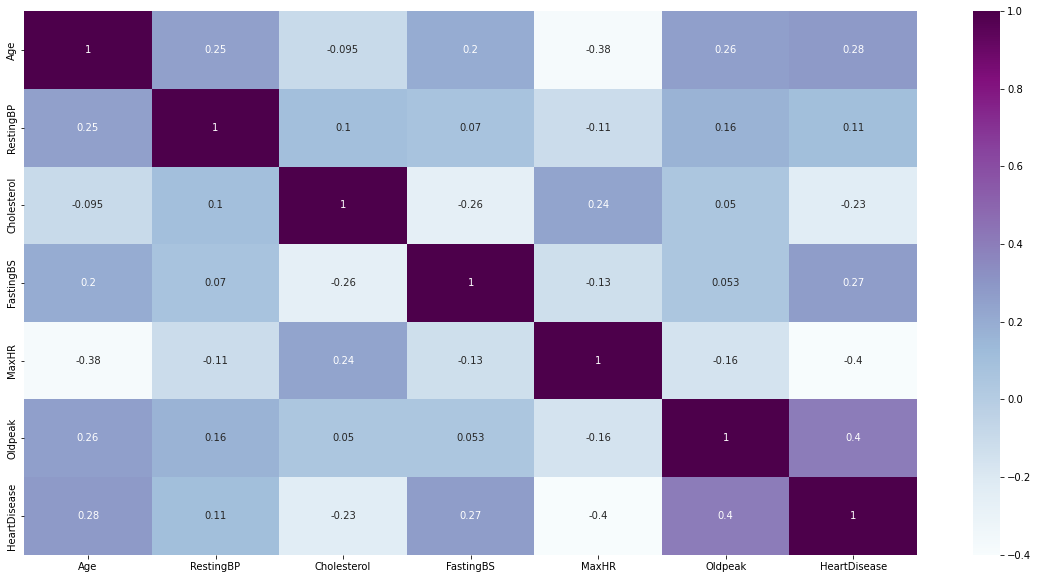

In [11]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

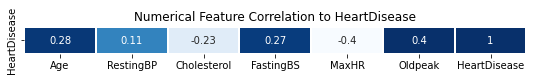

In [12]:
x = df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis = 1) #dropping categorical data 
def corrMat2(df,target='HeartDisease',figsize=(9,0.5),ret_id=False):
    
    corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, df.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='Blues',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Numerical Feature Correlation to {target}')
    
    if(ret_id):
        return corr
corrMat2(x)

array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

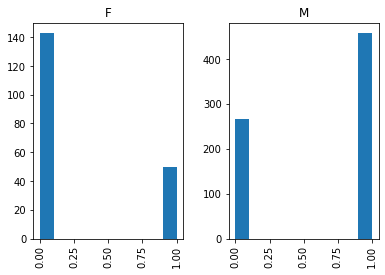

In [13]:
#df.groupby('Sex')['HeartDisease'].iplot(kind='histogram',subplots=True)
df['HeartDisease'].hist(by=df['Sex'])

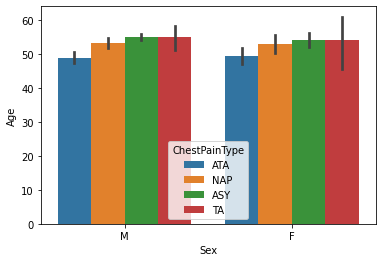

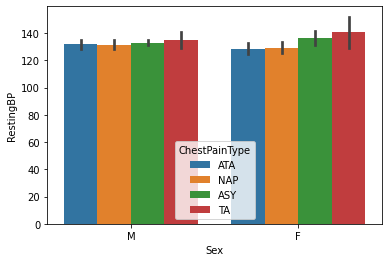

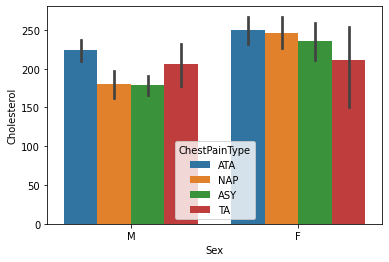

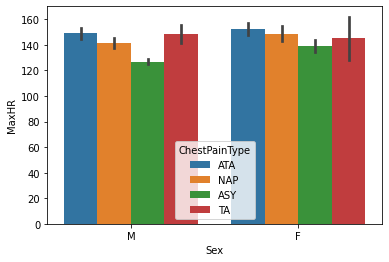

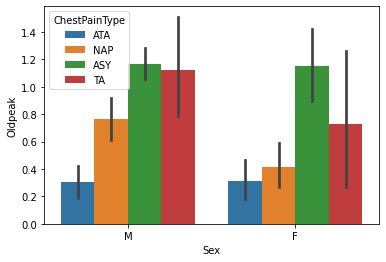

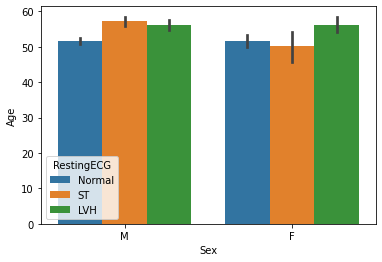

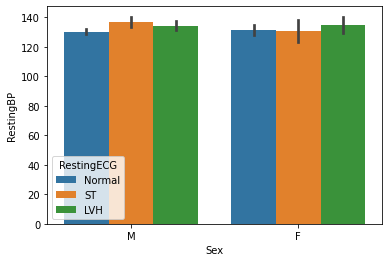

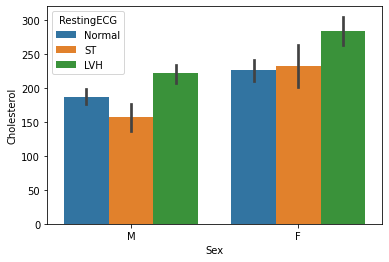

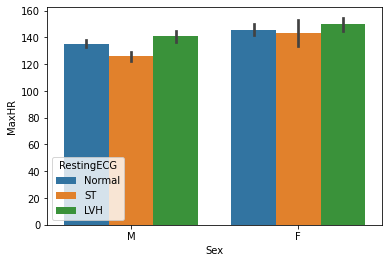

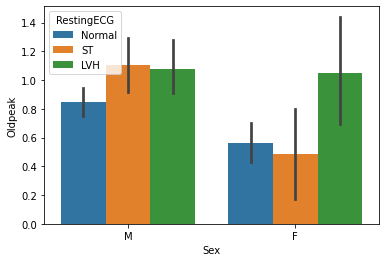

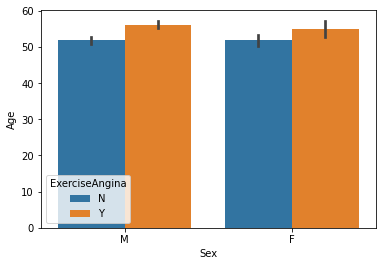

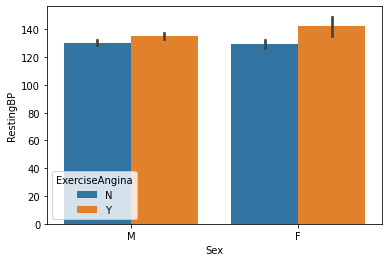

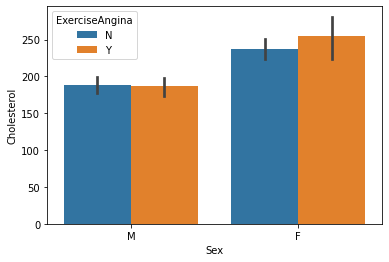

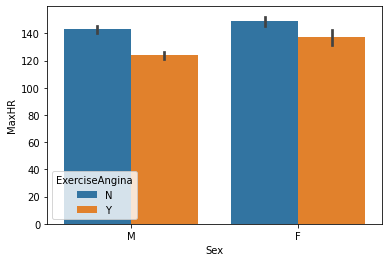

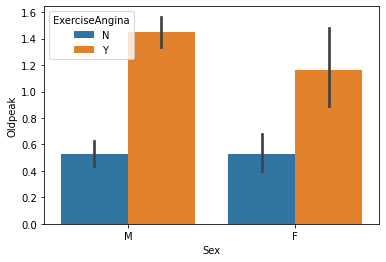

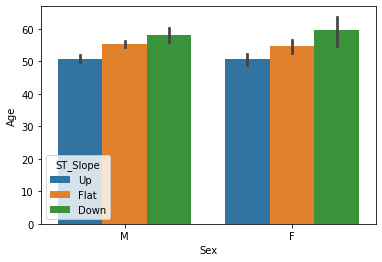

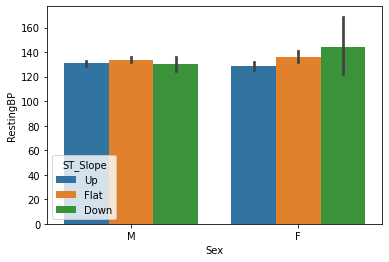

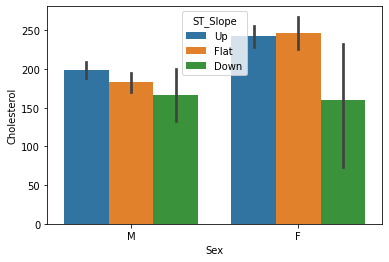

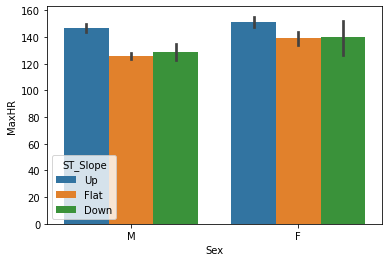

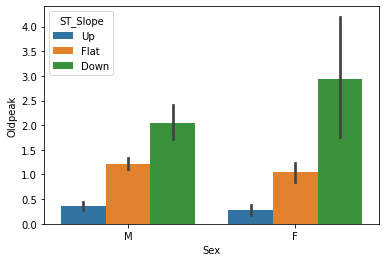

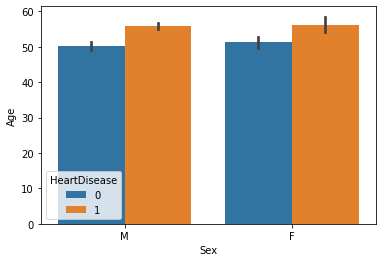

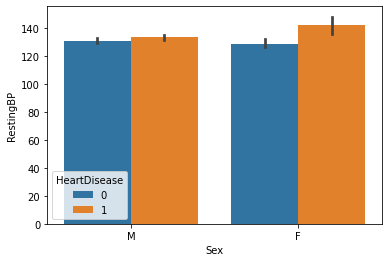

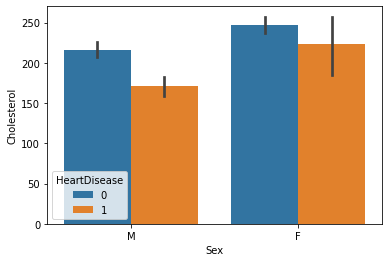

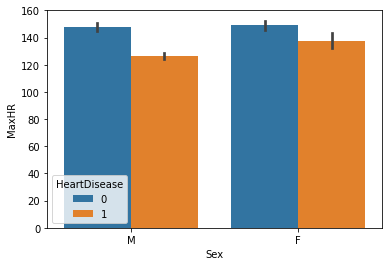

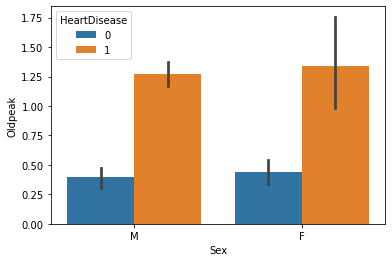

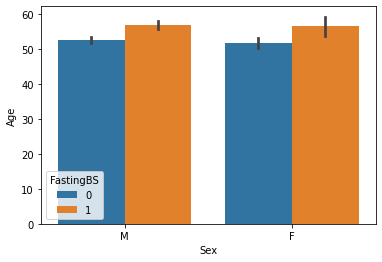

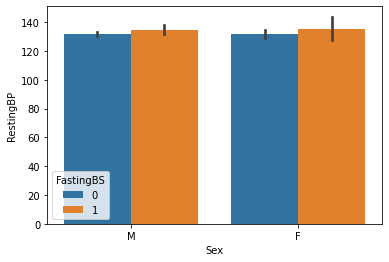

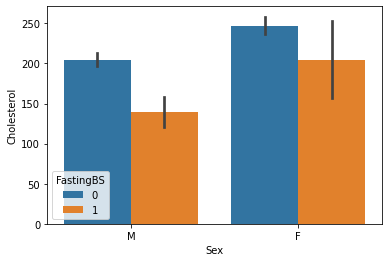

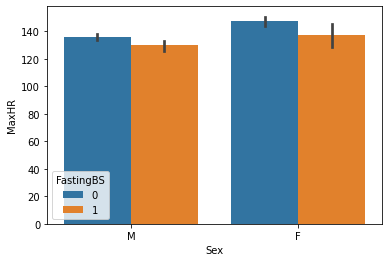

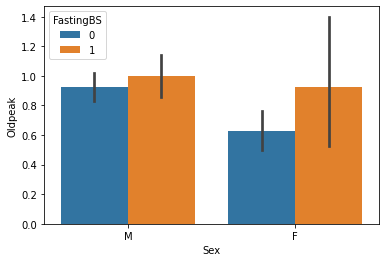

In [14]:
obj = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease','FastingBS']
num = []
for i in df.columns:
    if i not in obj:
        num.append(i)
for i in range(len(obj)):
    x='Sex'
    for j in range(len(num)):
        if obj[i] != x:
            sns.barplot(x= x,y=num[j],hue=obj[i],data=df)
            plt.show()

In [15]:
df.groupby('Sex')['HeartDisease'].mean().sort_values(ascending=False)*100

Sex
M    63.172414
F    25.906736
Name: HeartDisease, dtype: float64

In [16]:
df.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)*100

ChestPainType
ASY    79.032258
TA     43.478261
NAP    35.467980
ATA    13.872832
Name: HeartDisease, dtype: float64

In [17]:
df.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False)*100

RestingECG
ST        65.730337
LVH       56.382979
Normal    51.630435
Name: HeartDisease, dtype: float64

In [18]:
df.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False)*100

ExerciseAngina
Y    85.175202
N    35.100548
Name: HeartDisease, dtype: float64

In [19]:
df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)*100

ST_Slope
Flat    82.826087
Down    77.777778
Up      19.746835
Name: HeartDisease, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

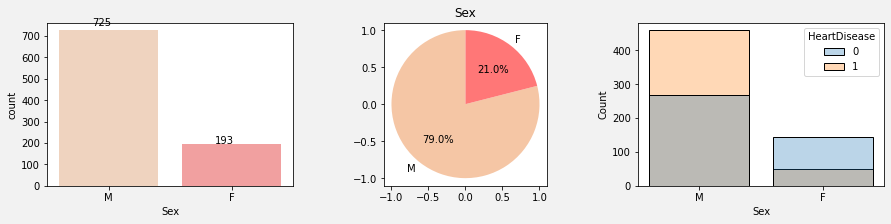

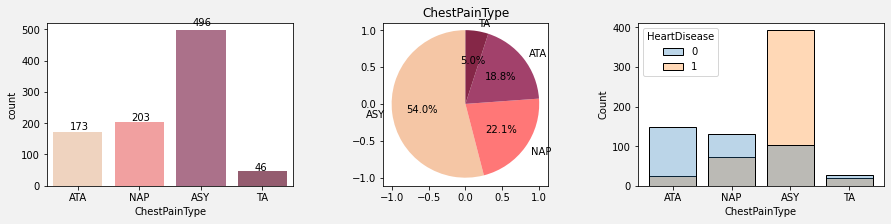

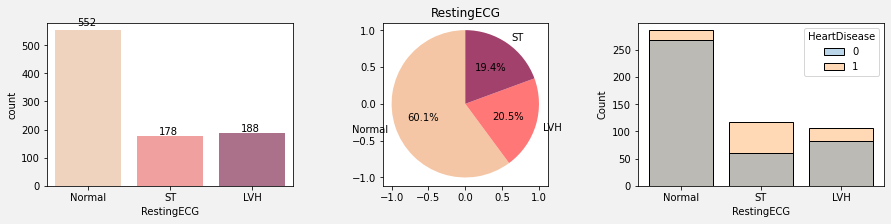

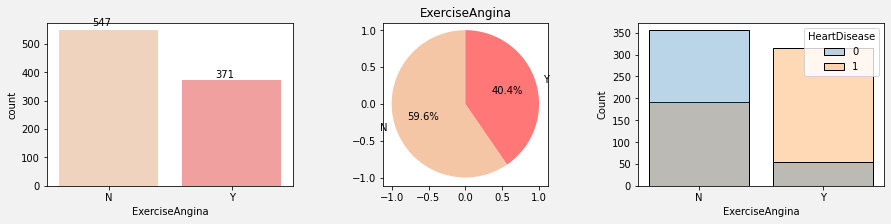

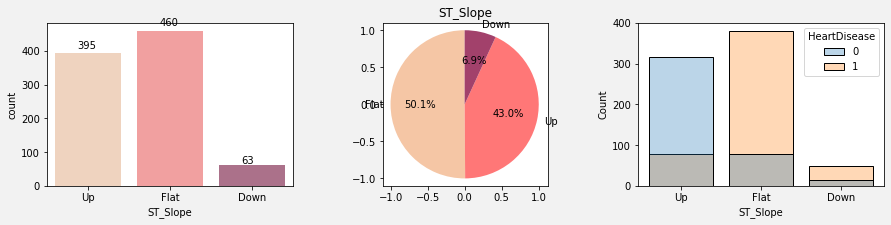

In [20]:
# Summary of categorical data
palette = ['#F5C6A5', '#FF7777', '#A2416B','#852747']

for feature in cat_cols:
    fig, ax = plt.subplots(1,3, figsize=(15,3))
    fig.patch.set_facecolor('#F2F2F2')

    sns.countplot(x=df[feature], data=df, ax=ax[0], palette=palette, alpha=0.8)
    for p, label in zip(ax[0].patches, df[feature].value_counts().index):
        ax[0].annotate(p.get_height(), (p.get_x()+p.get_width()/3, p.get_height()*1.03))
#    ax[0].spines['top'].set_visible(False)
#    ax[0].spines['right'].set_visible(False)
                    
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=ax[1], colors=palette, frame=True)
    ax[1].set_ylabel('')
    ax[1].set_title(feature)

    sns.histplot(x=feature,data=df, hue='HeartDisease',ax=ax[2], alpha=0.3, shrink=.8)  
    
plt.tight_layout

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



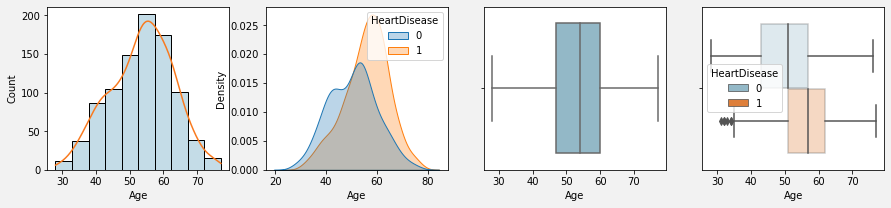

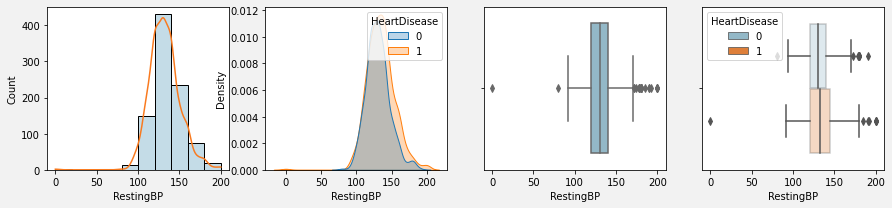

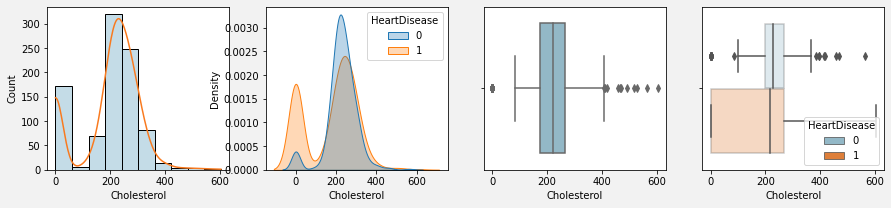

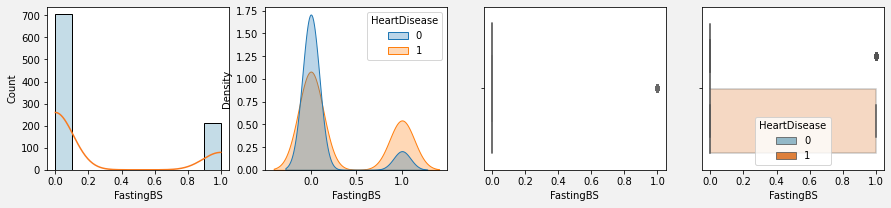

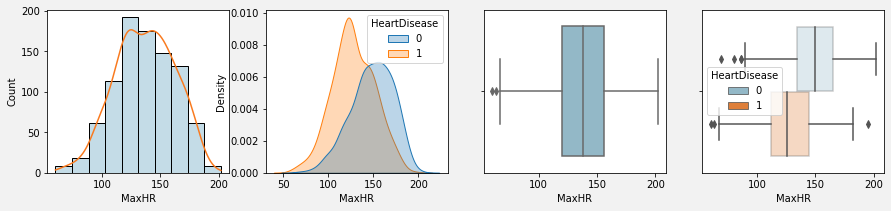

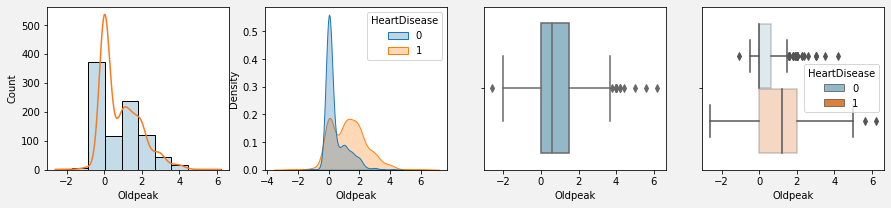

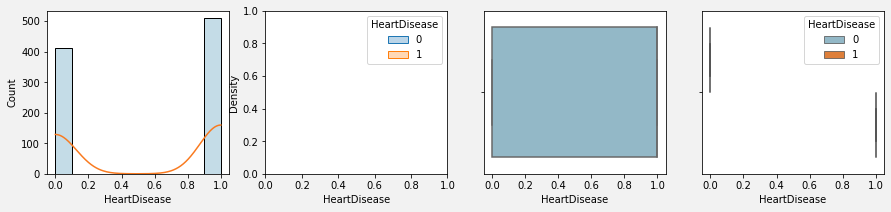

In [21]:
# Plots on numerical features to check data quality and data distribution
color ='#8abbd0'

for i in num_cols:
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    fig.patch.set_facecolor( '#F2F2F2')
    sns.histplot(df[i], bins=10, ax=ax[0],  color=color, kde=True)
    ax[0].lines[0].set_color('#F97A1F')
    sns.kdeplot(x=i,data=df, hue='HeartDisease',ax=ax[1],shade=True, alpha=0.3)
    sns.boxplot(x=i, data=df,ax=ax[2], color=color)
    sns.boxplot(x=i, data=df, hue='HeartDisease',y=[""]*len(df),ax=ax[3],palette=['#8abbd0','#F97A1F'],boxprops=dict(alpha=.3))
    plt.tight_layout

**In this section, we will preprocess the data before feeding data into training models.**

*Remove outlier from dataset:-*
Looking at the boxplot above, we notice that RestingBP has extreme outlier at 0. This might be an incorrect value, so we remove it from the dataset 
*Impute missing values:-* 
Cholesterol has a few zero values, which are replaced with median 
*Scaling features:-*
In the EDA section, we see that there is significant difference in order of magnitude between numerical features. Therefore, StandardScaler is used to adjust feature sizes 
*Convert categorical values to numerical values:-*
We use LabelEncoder to transform the data

In [22]:
# Remove outlier
row = df[df['RestingBP']==0].index
df = df.drop(df.index[row])

# Impute zero values with median
median_values = df['Cholesterol'].median()
row = df[df['Cholesterol']==0].index
df.loc[row, 'Cholesterol'] = median_values

# Adjust feature sizes
num_features = num_cols[:-1]
scaler = StandardScaler()
scaler.fit(df[num_features])

# Convert categorical values to numerical values
le = LabelEncoder()
#heart[cat_cols] = heart[cat_cols].astype('str').apply(le.fit_transform)
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

In [23]:
df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)*100

ST_Slope
1    82.788671
0    77.777778
2    19.746835
Name: HeartDisease, dtype: float64

In [24]:
df.groupby('Sex')['HeartDisease'].mean().sort_values(ascending=False)*100

Sex
1    63.121547
0    25.906736
Name: HeartDisease, dtype: float64

In [25]:
df.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False)*100

ExerciseAngina
1    85.175202
0    34.981685
Name: HeartDisease, dtype: float64

In [26]:
df.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False)*100

RestingECG
2    65.730337
0    56.382979
1    51.542650
Name: HeartDisease, dtype: float64

In [27]:
df.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)*100

ChestPainType
0    79.032258
3    43.478261
2    35.148515
1    13.872832
Name: HeartDisease, dtype: float64

**ENCODINGS =>**
Sex :- 1(M) 0(F)
ChestPainType :- ASY(0) TA(3) NAP(2) ATA(1)
RestingECG :- ST(2) LVH(0) Normal(1)
ExerciseAngina :- Y(1) N(0)
ST_Slope :- Flat(1) Down(0)  Up(2)

*SPLITTING DATA MODELS*

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(["HeartDisease"], axis = 1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [29]:
print(X_train.shape)
print(X_test.shape)

(733, 11)
(184, 11)


Test train split is 80-20 as its proven to give the best results based on literature review.

**PREDICTION MODELS**

1. LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "saga", max_iter = 10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [31]:
model.score(X_test, y_test)

0.8315217391304348

In [32]:
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
#print(X_test)
f1_score(y_test, y_pred, average='binary')

0.848780487804878

2. RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
model.score(X_test, y_test)

0.8478260869565217

In [35]:
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
#print(X_test)
f1_score(y_test, y_pred, average='binary')

0.8666666666666667

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        82
           1       0.84      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



3. DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
print(model.score(X_test, y_test))

0.7880434782608695


In [39]:
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
#print(X_test)
f1_score(y_test, y_pred, average='binary')

0.8059701492537314

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        82
           1       0.82      0.79      0.81       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



4. SVM with RBF Kernel

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train1 = X_train
X_test1 = X_test
scaler.fit(X_train1)

X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [42]:
from sklearn.svm import SVC

model = SVC(kernel = "rbf", gamma = 0.01, C = 5)
model.fit(X_train1, y_train)

SVC(C=5, gamma=0.01)

In [43]:
model.score(X_test1, y_test)

0.8586956521739131

In [44]:
from sklearn.metrics import f1_score
y_pred=model.predict(X_test1)
#print(X_test)
f1_score(y_test, y_pred, average='binary')

0.8761904761904761

5. Gaussian NB

In [45]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [46]:
model.score(X_test, y_test)

0.842391304347826

In [47]:
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
#print(X_test)
f1_score(y_test, y_pred, average='binary')

0.8599033816425121

6. KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 18)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [49]:
model.score(X_test, y_test)

0.6630434782608695

In [50]:
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
#print(X_test)
f1_score(y_test, y_pred, average='binary')

0.6868686868686869

7. Logistic Regression with pre-scaled data

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train2 = X_train
X_test2 = X_test
scaler.fit(X_train2)

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "saga", max_iter = 10000)
model.fit(X_train2, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [52]:
model.score(X_test2, y_test)

0.842391304347826

In [53]:
from sklearn.metrics import f1_score
y_pred=model.predict(X_test2)
#print(X_test)
f1_score(y_test, y_pred, average='binary')

0.8625592417061612

8. Extra Trees Classifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_features=4, random_state=0)
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [55]:
clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([0])

In [56]:
clf.score(X_test, y_test)

0.8804347826086957

In [57]:
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
#print(X_test)
f1_score(y_test, y_pred, average='binary')

0.7311827956989247

**Accuracy of models** :-
*Logistic regression with pre-scaled data* -> 84.23% 
*KNN* -> 84.23%
*Gaussian NB* -> 84.23%
*SVM with RBF Kernel* -> 85.86%
*Decision Tree* -> 78.80%
*Random Forest* -> 84.78%
*Logistic Regression* -> 83.15%
*ExtraTreeClassifier* -> 88.04%

**F1 score of models** :- Logistic Regression -> 0.8487
Random Forest -> 0.8666
Decision Tree -> 0.8078
SVM with RBF Kernel -> 0.8762
Gaussian NB -> 0.8599
KNN -> 0.8557
Logistic Regression with pre-scaled data -> 0.8625
Extra Trees Classifier -> 0.7311

**Conclusion** : SVM with RBF Kernel performs the best based on F1 score.

**FEATURE SELECTION**

Text(0.5, 0, 'Random Forest Feature Importance')

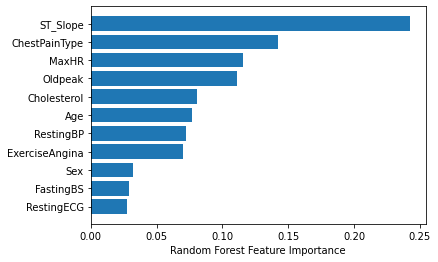

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = df.drop(["HeartDisease"], axis = 1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
#forest.feature_importances_
#plt.barh(X.columns, forest.feature_importances_)
sorted_idx = forest.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

**Feature Importance :-** ST_slope, ChestPainType, MaxHR are the most significant features.

In [59]:
X = df.drop(["HeartDisease","RestingECG"], axis = 1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
scaler = StandardScaler()
X_train1 = X_train
X_test1 = X_test
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)
model = SVC(kernel = "rbf", gamma = 0.01, C = 5)
model.fit(X_train1, y_train)
y_pred = model.predict(X_test1)
print("Accuracy : ", model.score(X_test1, y_test))
print("F1 score : ", f1_score(y_test, y_pred, average='binary'))

Accuracy :  0.8608695652173913
F1 score :  0.875968992248062


In [60]:
X = df.drop(["HeartDisease","RestingECG","FastingBS"], axis = 1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
scaler = StandardScaler()
X_train1 = X_train
X_test1 = X_test
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)
model = SVC(kernel = "rbf", gamma = 0.01, C = 5)
model.fit(X_train1, y_train)
y_pred = model.predict(X_test1)
print("Accuracy : ", model.score(X_test1, y_test))
print("F1 score : ", f1_score(y_test, y_pred, average='binary'))

Accuracy :  0.8391304347826087
F1 score :  0.8537549407114625


In [61]:
X = df.drop(["HeartDisease","RestingECG","FastingBS","Sex"], axis = 1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
scaler = StandardScaler()
X_train1 = X_train
X_test1 = X_test
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)
model = SVC(kernel = "rbf", gamma = 0.01, C = 5)
model.fit(X_train1, y_train)
y_pred = model.predict(X_test1)
print("Accuracy : ", model.score(X_test1, y_test))
print("F1 score : ", f1_score(y_test, y_pred, average='binary'))

Accuracy :  0.7956521739130434
F1 score :  0.815686274509804


In [62]:
X = df.drop(["HeartDisease","Sex"], axis = 1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
scaler = StandardScaler()
X_train1 = X_train
X_test1 = X_test
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)
model = SVC(kernel = "rbf", gamma = 0.01, C = 5)
model.fit(X_train1, y_train)
y_pred = model.predict(X_test1)
print("Accuracy : ", model.score(X_test1, y_test))
print("F1 score : ", f1_score(y_test, y_pred, average='binary'))

Accuracy :  0.8478260869565217
F1 score :  0.8679245283018868


In [63]:
X = df.drop(["HeartDisease","FastingBS"], axis = 1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
scaler = StandardScaler()
X_train1 = X_train
X_test1 = X_test
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)
model = SVC(kernel = "rbf", gamma = 0.01, C = 5)
model.fit(X_train1, y_train)
y_pred = model.predict(X_test1)
print("Accuracy : ", model.score(X_test1, y_test))
print("F1 score : ", f1_score(y_test, y_pred, average='binary'))

Accuracy :  0.8478260869565217
F1 score :  0.8627450980392157


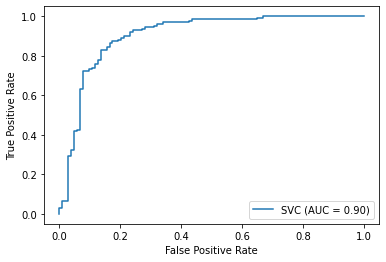

In [64]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test1, y_test)

ROC Score = 0.9

In [65]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [66]:
# Function to determine model performance based on various metrics
def model_performance(clf, X_test, y_test, y_pred):
    
    # Calculate the accuracy of the model
    score = clf.score(X_test, y_test).round(3)*100 
    
    # Calculate the precision score of the model
    precision = precision_score(y_test, y_pred).round(3)*100
    
     # Calculate the recall score of the model
    recall = recall_score(y_test, y_pred).round(3)*100
    
    # Calculate the F1 score of the model
    f1 = f1_score(y_test, y_pred).round(3)*100
    
    # Calculaate the ROC_AUC score
    try:
        y_pred_prob = clf.predict_proba(X_test) [:,1]
    except:
        roc = 'N.A'        
    else: 
        roc = roc_auc_score(y_test, y_pred_prob).round(3)*100 
    
    results = [name, score, precision, recall, f1, roc]
        
    return results

In [67]:
clfs = [('SVC', SVC(kernel = "rbf", gamma = 0.01, C = 5)),]  
       
results = []
importance_tables = []
confusion_tables = []

for name, clf in  clfs:

    # Train models
    clf.fit(X_train1, y_train)  
    # Predict target value     
    y_pred = clf.predict(X_test1)      
    
    # Result table to show how different model performs
    result = model_performance(clf, X_test1, y_test, y_pred)        
    results.append(result)
        
    # Determine confusion matrix for different models
    cm = confusion_matrix(y_test, y_pred)
    confusion_tables.append([name,cm])

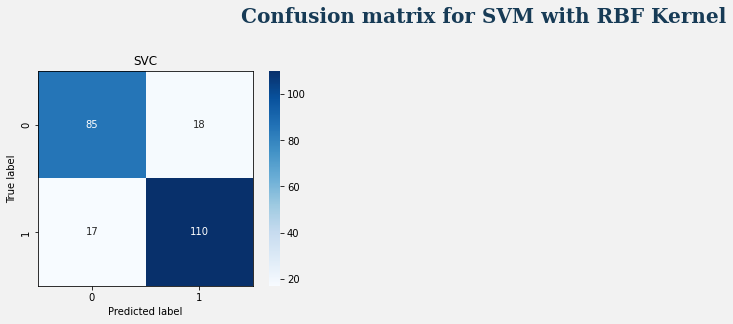

In [68]:
# Plot confusion matrix for different models
fig = plt.figure(figsize=(15,8))
fig.patch.set_facecolor('#F2F2F2')

for i in range(len(confusion_tables)):
    ax = plt.subplot(2,3, i+1)
    model_name = confusion_tables[i][0]
    ax = sns.heatmap(confusion_tables[i][1], cmap='Blues', annot=True, fmt='d', square=True)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title(model_name)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
plt.suptitle('Confusion matrix for SVM with RBF Kernel', 
                     fontfamily='serif', fontsize=20, color='#173b56', fontweight='bold')
plt.tight_layout(pad=2)

**Final Results :- SVM with RBF Kernel performs the best with an AUC score of 0.90, F1 score of 87.62% and accuracy of 85.86%.**